In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [10]:
train = pd.read_excel('train.xlsx')
train1=pd.read_excel('train1.xlsx')
test=pd.read_excel('test.xlsx')
test1=pd.read_excel('test1.xlsx')

In [11]:
estimators = [
     ('lr', RidgeCV()),
     ('svr', LinearSVR(random_state=42))
 ]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=1000)
 )
reg.fit(train, train1)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterat

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=1000))

In [12]:
predict_train = reg.predict(train)
mse_on_train = np.sqrt(mean_squared_error(train1 , predict_train))
print('rmse_on_train', mse_on_train)
predictions = reg.predict(test)
print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(predictions, test1))))

rmse_on_train 3.244361575538723
Root Mean Squared Error: 3.3740251526998457


[]

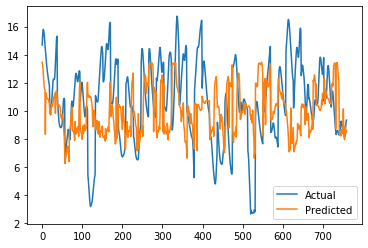

In [13]:
import matplotlib.pyplot as plt
plt.plot(test1,label='Actual')
plt.plot(predictions,label='Predicted')
plt.legend()
plt.plot()